# COGS 109 Final Project Report
### Molly Varozza, Daniil Magaril, Amy Li, Jason Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("imports-85.csv")

print(data.shape)
print(type(data))

(205, 27)
<class 'pandas.core.frame.DataFrame'>


### City MPG vs Engine Size

In [3]:
# Duration on product-related page vs whether they purchased something or not 
cityMPG = data['23']
engineSize = data['16']

cMPG_train, cMPG_test, eS_train, eS_test = train_test_split(cityMPG, engineSize, test_size = .2)
'''
X,Y =[],[]
for i in range(len(revenue)):
    if(productRelatedDuration[i]<20000):
        X.append(revenue[i])
        Y.append(productRelatedDuration[i])
        '''


'\nX,Y =[],[]\nfor i in range(len(revenue)):\n    if(productRelatedDuration[i]<20000):\n        X.append(revenue[i])\n        Y.append(productRelatedDuration[i])\n        '

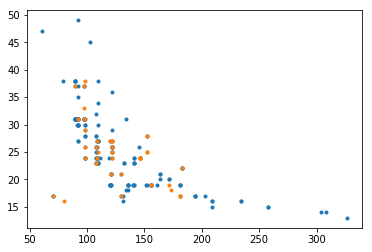

In [4]:
X = eS_train
Y = cMPG_train

#initial data plot
plt.plot(X, Y, '.')
plt.plot(eS_test, cMPG_test, '.')

In [5]:
# First Order Model
A1 = np.column_stack((np.ones((X.shape)), X))
w1 = np.linalg.lstsq( A1, Y, rcond = None)[0]

A1_test = np.column_stack((np.ones((eS_test.shape)), eS_test))

y_pred1 = np.matmul(A1, w1)
y_pred1_test = np.matmul(A1_test,w1)


In [6]:
# Second Order Model
A2 = np.column_stack((np.ones((X.shape)), X, np.square(X)))
w2 = np.linalg.lstsq( A2, Y, rcond = None)[0]

A2_test = np.column_stack((np.ones((eS_test.shape)), eS_test, np.square(eS_test)))

y_pred2 = np.matmul(A2, w2)
y_pred2_test = np.matmul(A2_test,w2)

In [7]:
# Logarithmic Model
A3 = np.column_stack((np.ones((X.shape)), np.log(X)))
w3 = np.linalg.lstsq( A3, Y, rcond = None)[0]

A3_test = np.column_stack((np.ones((eS_test.shape)), np.log(eS_test)))

y_pred3 = np.matmul(A3, w3)
y_pred3_test = np.matmul(A3_test, w3)

In [8]:
#Use matrices generated above to create models

xRange = np.linspace(min(X), max(X))
ones = np.ones(len(xRange))
squares = np.square(xRange)
logs = np.log(xRange)

A1 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A1, w1)


A2 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A2, w2)

# y = A + B * log(x)
A3 = np.column_stack((ones, logs))
yplot3 = np.matmul(A3, w3)

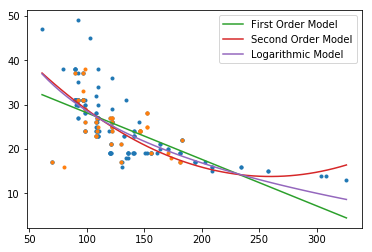

In [9]:
#Plot data alongside created models
plt.plot(X, Y, '.')
plt.plot(eS_test, cMPG_test, '.')

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)
logModel, = plt.plot(xRange, yplot3)

plt.legend([linModel, quadModel, logModel], ["First Order Model", "Second Order Model", "Logarithmic Model"])

In [10]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred1_test - cMPG_test))
SSEQuad = sum(np.square(y_pred2_test - cMPG_test))
SSELog = sum(np.square(y_pred3_test - cMPG_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad, '\nLogarithmic SSE:', SSELog)

('Linear SSE:', 971.1373931972959, '\nQuadratic SSE:', 1173.2769356241845, '\nLogarithmic SSE:', 1110.601808961422)


### City MPG vs Curb Weight

In [11]:
# cityMPG vs curb weight
cityMPG = data['23']
curbWeight = data['12']

cMPG1_train, cMPG1_test, cw_train, cw_test = train_test_split(cityMPG, curbWeight, test_size = .2)

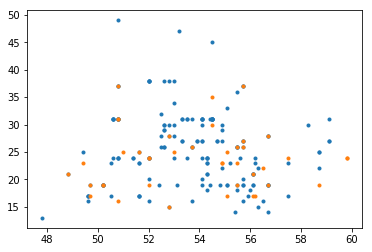

In [12]:
X1 = cw_train
Y1 = cMPG1_train

#initial data plot
plt.plot(X1, Y1, '.')
plt.plot(cw_test, cMPG1_test, '.')

In [13]:
# First Order Model
A4 = np.column_stack((np.ones((X1.shape)), X1))
w4 = np.linalg.lstsq( A4, Y1, rcond = None)[0]

A4_test = np.column_stack((np.ones((cw_test.shape)), cw_test))

y_pred4 = np.matmul(A4, w4)
y_pred4_test = np.matmul(A4_test,w4)


In [14]:
# Second Order Model
A5 = np.column_stack((np.ones((X1.shape)), X1, np.square(X1)))
w5 = np.linalg.lstsq( A5, Y1, rcond = None)[0]

A5_test = np.column_stack((np.ones((cw_test.shape)),cw_test, np.square(cw_test)))

y_pred5 = np.matmul(A5, w5)
y_pred5_test = np.matmul(A5_test, w5)

In [15]:
#Use matrices generated above to create models

xRange = np.linspace(min(X1), max(X1))
ones = np.ones(len(xRange))
squares = np.square(xRange)

A4 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A4, w4)
A5 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A5, w5)

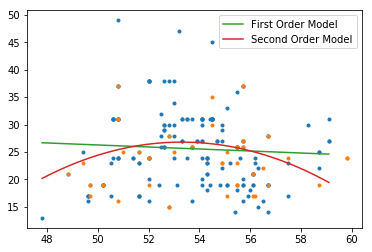

In [16]:
#Plot data alongside created models
plt.plot(X1,Y1, '.')
plt.plot(cw_test, cMPG1_test, '.')

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)

plt.legend([linModel, quadModel], ["First Order Model", "Second Order Model"])

In [17]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred4_test - cMPG1_test))
SSEQuad = sum(np.square(y_pred5_test - cMPG1_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad, '\nLogarithmic SSE:', SSELog)

('Linear SSE:', 1354.2130636143302, '\nQuadratic SSE:', 1293.822906633835, '\nLogarithmic SSE:', 1110.601808961422)


### Number of Cylinders vs City MPG

In [18]:
# Num cylinders vs City MPG
cityMPG = data['23']
numCylinders = data['15.5']

cMPG2_train, cMPG2_test, nc_train, nc_test = train_test_split(cityMPG, numCylinders, test_size = .2)

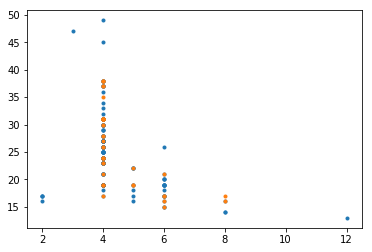

In [19]:
X2 = nc_train
Y2 = cMPG2_train

#initial data plot
plt.plot(X2, Y2, '.')
plt.plot(nc_test,cMPG2_test, '.')

In [20]:
#First order model
A6 = np.column_stack((np.ones((X2.shape)), X2))
w6 = np.linalg.lstsq( A6, Y2, rcond = None)[0]

A6_test = np.column_stack((np.ones((nc_test.shape)), nc_test))

y_pred6 = np.matmul(A6, w6)
y_pred6_test = np.matmul(A6_test,w6)


In [21]:
#Second order model
A7 = np.column_stack((np.ones((X2.shape)), X2, np.square(X2)))
w7 = np.linalg.lstsq( A7, Y2, rcond = None)[0]

A7_test = np.column_stack((np.ones((nc_test.shape)), nc_test, np.square(nc_test)))
y_pred7 = np.matmul(A7, w7)
y_pred7_test = np.matmul(A7_test,w7)


In [22]:
#Logarithmic Model
A8 = np.column_stack((np.ones((X2.shape)), np.log(X2)))
w8 = np.linalg.lstsq( A8, Y2, rcond = None)[0]

A8_test = np.column_stack((np.ones((nc_test.shape)), np.log(nc_test)))
y_pred8 = np.matmul(A8, w8)
y_pred8_test = np.matmul(A8_test,w8)


In [23]:
#Use matrices generated above to create models
xRange = np.linspace(min(X2), max(X2))
ones = np.ones(len(xRange))
squares = np.square(xRange)
logs = np.log(xRange)

A6 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A6, w6)

A7 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A7, w7)

# y = A + B * log(x)
A8 = np.column_stack((ones, logs))
yplot3 = np.matmul(A8, w8)

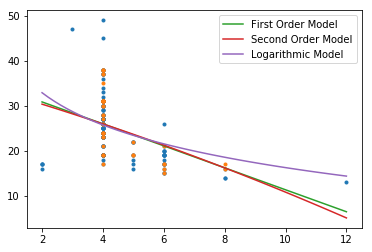

In [24]:
#Plot data alongside created models
plt.plot(X2,Y2, '.')
plt.plot(nc_test,cMPG2_test, '.')

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)
logModel, = plt.plot(xRange, yplot3)

plt.legend([linModel, quadModel, logModel], ["First Order Model", "Second Order Model", "Logarithmic Model"])

In [25]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred6_test - cMPG2_test))
SSEQuad = sum(np.square(y_pred7_test - cMPG2_test))
SSELog = sum(np.square(y_pred8_test - cMPG2_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad, '\nLogarithmic SSE:', SSELog)

('Linear SSE:', 1402.819317089609, '\nQuadratic SSE:', 1412.0367695996342, '\nLogarithmic SSE:', 1461.4132874558193)
